###### Exercise in Photogrammetry I
## **Ex.8 : Classification**
### Hand out: 10.06.2020 
### Submission: 19.06.2020 
### Points: 32


We have given a dataset ```data/fruits_data.npy``` which contains the average grayscale value (first column) and the length (in centimeter, second column) of apples and pears. The file ```data/fruits_label.npy``` contains the corresponding label $w$ {0=apple, 1=pear} of each fruit. Based on this dataset (so called traingset) we want to estimate the labels of the fruits in ```data/test_data.npy```(so called testset). In the end we can evaluate our classifier by comparing the predicted labels with the true labels (specified in ```data/test_label.npy```.

## A. kNN - Classifier
**Tasks:**
1. load the training and testset and visualize them based on their labels. Don't forget the legend and to label the axes. (2 Points)
2. write a function ```kNN(...)``` which takes as input the *training data*, the *training labels*, the *test data* (not the *test labels*!) and the number of neighbors *k*. Predict for each test point the label based on the *k* nearest neighbors of the training set. Return the predicted labels. (8 Points)
3. Predict the labels of the testset with the ```kNN(...)``` function based on their 10 nearest neighbors. Visualize the results. (2 Points)
4. Use the function ```plotConfusionMatrix(...)``` to compute and visualize the confusion matrix for the testset. Compute and print the precision, recall for each class (apples and pears) and the overall accuracy. (4 Points)

   k-nearest neighbor: https://www.youtube.com/watch?v=b2PH25Zizm4 1:05:39

### B. MAP - Classifier 
5. compute and print the mean $\mu_i \in R^{2x1}$, the covariance matrix $\Sigma_i \in R^{2x2}$, and the probability of occurence $P(w_i)$ for each class $w_i$ (4 Points)
6. write a function ```MAP(...)``` which takes the means, covariance matrices and probabilities of the classes as well as the testdata and returns the predicted labels. The prediction of the labels should be based on a maximum-a-posteriori classification. Assume that the data is normal distributed. You can use the following pseudo code for your implementation (6 Points):
    - for each class $w_i:= \{i,\mu_i,\Sigma_i,P(w_i)\}$:
        - for each test point $e_n\in R^{2x1}$: 
            - compute the likelihood $P(e_n|w_i)$ as a bivariate normal distribution: $P(e_n|w_i)= N(e_n|\mu_i,\Sigma_i) = \frac{exp(-\frac{1}{2}(e_n-\mu_i)^T\Sigma_i^{-1}(e_n-\mu_i))}{2\pi\sqrt{|\Sigma_i|}}$,  where $|\Sigma_i|$ is the determinant of $\Sigma_i$
            - compute $P(w_i|e_n) = P(e_n|w_i) P(w_i)$ 
    - return the most likely class for each point: $w_{n,i^*}=\text{arg max}_i P(w_i|e_n)$

7. Predict the labels of the testset with your ```MAP(...)``` function. Visualize the results. (2 Points)
8. Plot the confusion matrix for the MAP classification. Compute and print the precision, recall for each class (apples and pears) and the overall accuracy. (4 Points)

   MAP: need to learn from the internet

**Hint:** numpy has a lof of usefull inbuild functions for linear algebra you can use  (np.mean(), np.cov(), np.argmax(), np.argsort(), ...). Make sure your matrices/ vectors have the expected dimensionality.

In [1]:
# import all required modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
def plotConfusionMatrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          classes = None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Returns the figure, the axis and the confusion matrix
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if classes is None:
        classes = np.unique(y_true)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax, fig, cm


In [3]:
# Load all the data.

fruits_data = np.load('data/fruits_data.npy')
fruits_label = np.load('data/fruits_label.npy')
test_data = np.load('data/test_data.npy')
test_label = np.load('data/test_label.npy')

# What are the variable types.
print('Variable types:')
print(type(fruits_data))
print(type(fruits_label))
print(type(test_data))
print(type(test_label))

# What do they contain.
print('Contain:')
print(fruits_data.dtype)
print(fruits_label.dtype)
print(test_data.dtype)
print(test_label.dtype)

# How many there are.
print('How many elements:')
print(len(fruits_data))
print(len(fruits_label))
print(len(test_data))
print(len(test_label))

# First examples.
print('First examples:')
print(fruits_data[0])
print(fruits_label[0])
print(test_data[0])
print(test_label[0])

Variable types:
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Contain:
float64
uint8
float64
uint8
How many elements:
4000
4000
500
500
First examples:
[0.48971067 7.65654927]
1
[0.78825929 6.63675841]
0


[]

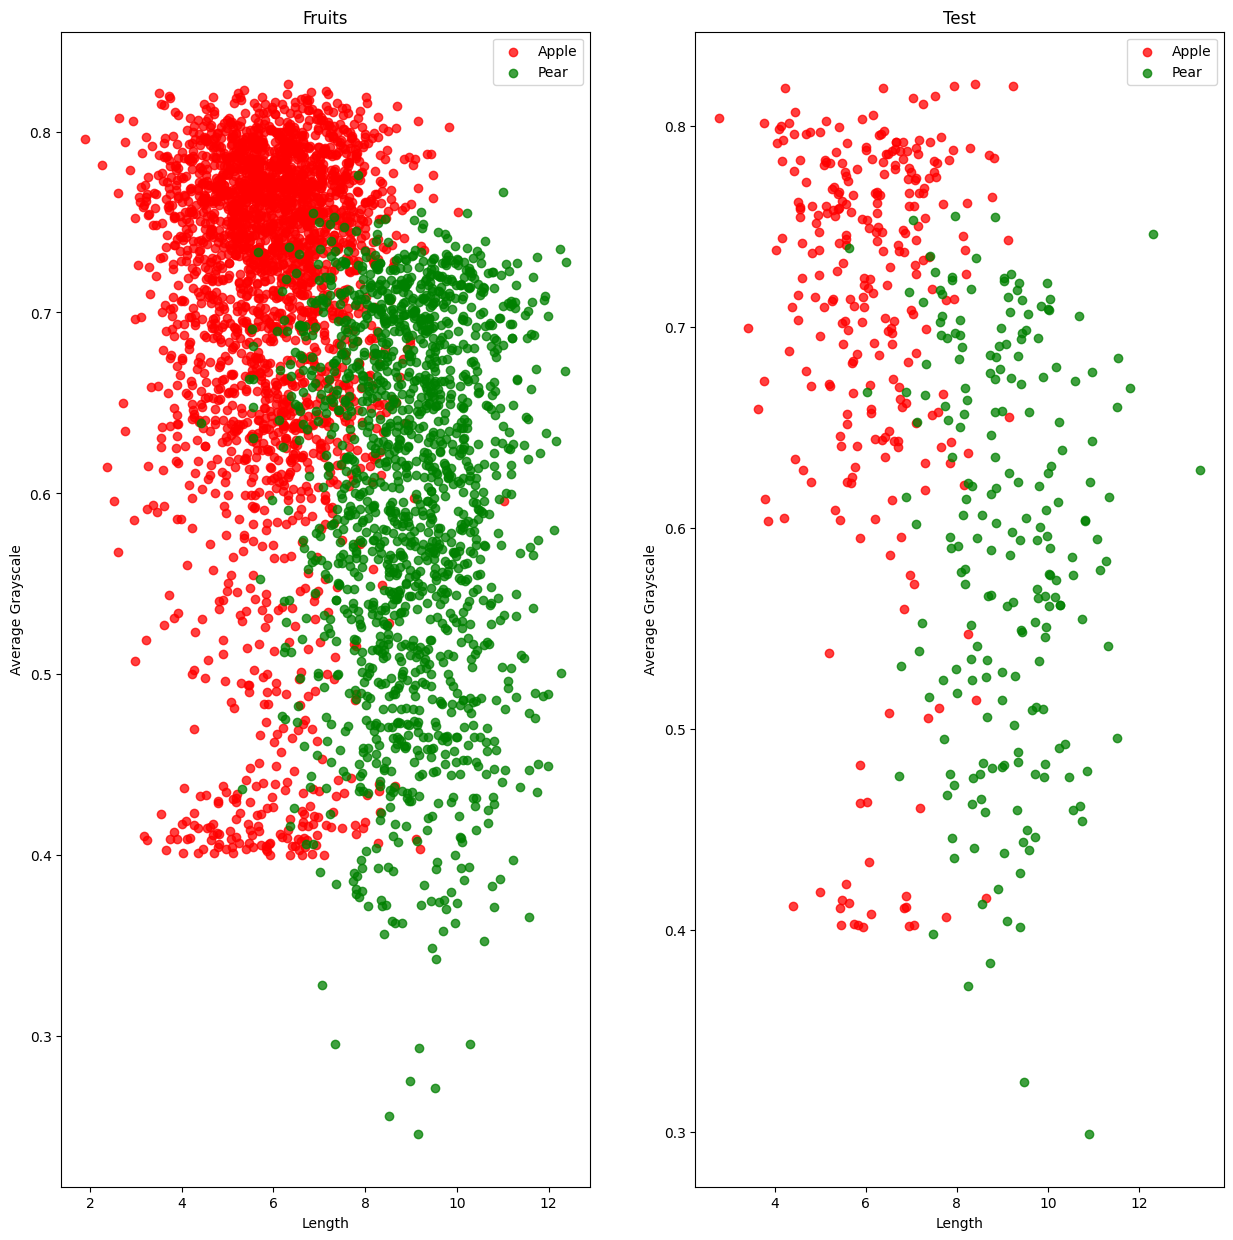

In [4]:
# Visualise both fruits and test.
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

# Find which ones are apples and pears to label them.
apples = fruits_data[fruits_label == 0]
pears = fruits_data[fruits_label == 1]

axs[0].set_title('Fruits')
axs[0].scatter(apples[:, 1], apples[:, 0], c='red', alpha=0.75, label='Apple')
axs[0].scatter(pears[:, 1], pears[:, 0], c='green', alpha=0.75, label='Pear')
axs[0].set_xlabel('Length')
axs[0].set_ylabel('Average Grayscale')
axs[0].legend(loc='upper right')

apples = test_data[test_label == 0]
pears = test_data[test_label == 1]

axs[1].set_title('Test')
axs[1].scatter(apples[:, 1], apples[:, 0], c='red', alpha=0.75, label='Apple')
axs[1].scatter(pears[:, 1], pears[:, 0], c='green', alpha=0.75, label='Pear')
axs[1].set_xlabel('Length')
axs[1].set_ylabel('Average Grayscale')
axs[1].legend(loc='upper right')

plt.plot()

In [5]:
# Z-score normalization.
def z_score_normalize(data: np.ndarray) -> (np.ndarray, np.float64, np.float64, np.float64, np.float64):
    '''

    Performs a Z-score normalization on a given dataset.

    Parameters:
    - data (np.ndarray): Data to normalize.

    Returns:
    - tuple[np.ndarray, np.float64, np.float64, np.float64, np.float64]: A tuple containing the normalized data, mean and standard deviation of array with 2 columns.
    '''

    X = data[:, 0]
    Y = data[:, 1]

    mean_X = np.mean(X)
    std_X = np.std(X)
    mean_Y = np.mean(Y)
    std_Y = np.std(Y)

    normalized_X = (X - mean_X) / std_X
    normalized_Y = (Y - mean_Y) / std_Y

    recombined_data = np.column_stack((normalized_X, normalized_Y))

    return recombined_data, mean_X, std_X, mean_Y, std_Y

# kNN classifier.
def kNN(training_data: np.ndarray, training_labels: np.ndarray, test_data: np.ndarray, neighbors: np.uint8) -> np.ndarray:
    '''
    
    Generates labels for test_data using k-nearest neighbors.
    I use euclidean distance using features after z-score normalization and then I take the majority vote.

    Parameters:
    - training_data (np.ndarray): Training data based on which we will classify our test_data.
    - training_labels (np.ndarray): Labels for the training data.
    - test_data (np.ndarray): Data to classify.
    - neighbors (np.uint8): How many neighbors to take into consideration for the kNN.

    Returns:
    - np.ndarray: Labels for input test_data.
    
    '''

    # Allocate return labels.
    out_labels = np.ndarray(len(test_data), dtype=np.uint8)

    # In our example we know that training_data has 2 features, but one is significantly larger than the other,
    # so we perform Z-score normalization first, so that both features contribute to the distance formula in the same way.
    normalized_training, mean_training_X, std_training_X, mean_training_Y, std_training_Y = z_score_normalize(training_data)

    # Normalize each test data with the same mean and std so the distance formula makes sense.
    test_data_normalized_X = (test_data[:, 0] - mean_training_X) / std_training_X
    test_data_normalized_Y = (test_data[:, 1] - mean_training_Y) / std_training_Y
    test_data_normalized = np.column_stack((test_data_normalized_X, test_data_normalized_Y))

    # Find distance to every record in training_data from every test_data point.
    for i in range(len(test_data)):
        distances = np.linalg.norm(normalized_training - test_data_normalized[i], axis=1)

        # Sort the distances and get sorted indices.
        sorted_indices = np.argsort(distances)

        # Get top k indices.
        top_k_indices = sorted_indices[:neighbors]

        # Fetch the labels of top indices.
        top_labels = training_labels[top_k_indices]

        # Count votes.
        counts = np.bincount(top_labels)

        # Find majority.
        majority = np.argmax(counts)

        # Save.
        out_labels[i] = majority

    return out_labels

[]

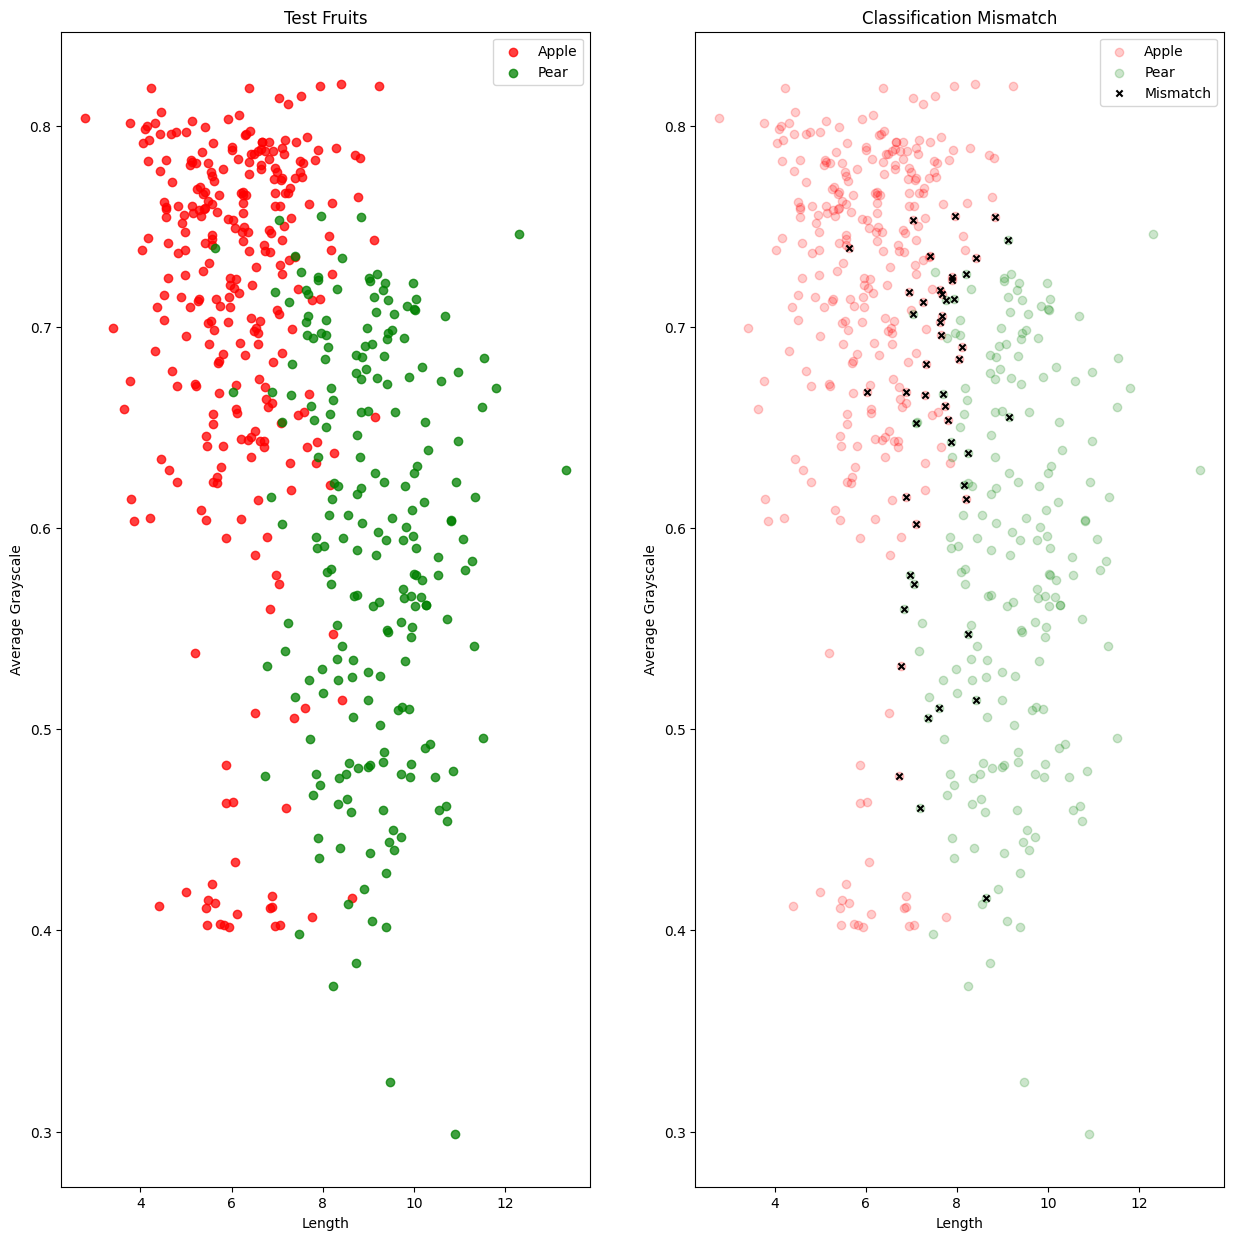

In [16]:
# Classify test data.
classified_labels = kNN(fruits_data, fruits_label, test_data, 10)

# Visualise classified data and show which ones were labeled wrongly.
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

# Find which ones are apples and pears to label them.
apples = test_data[test_label == 0]
pears = test_data[test_label == 1]

axs[0].set_title('Test Fruits')
axs[0].scatter(apples[:, 1], apples[:, 0], c='red', alpha=0.75, label='Apple')
axs[0].scatter(pears[:, 1], pears[:, 0], c='green', alpha=0.75, label='Pear')
axs[0].set_xlabel('Length')
axs[0].set_ylabel('Average Grayscale')
axs[0].legend(loc='upper right')

apples = test_data[classified_labels == 0]
pears = test_data[classified_labels == 1]
# Find the indices where the labels are mismatched
mismatched_indices = np.where(test_label != classified_labels)[0]
wrong = test_data[mismatched_indices]

axs[1].set_title('Classification Mismatch')
axs[1].scatter(apples[:, 1], apples[:, 0], c='red', alpha=0.2, label='Apple')
axs[1].scatter(pears[:, 1], pears[:, 0], c='green', alpha=0.2, label='Pear')
axs[1].scatter(wrong[:, 1], wrong[:, 0], c='black', alpha=1.0, label='Mismatch', marker='x', s=20)
axs[1].set_xlabel('Length')
axs[1].set_ylabel('Average Grayscale')
axs[1].legend(loc='upper right')

plt.plot()